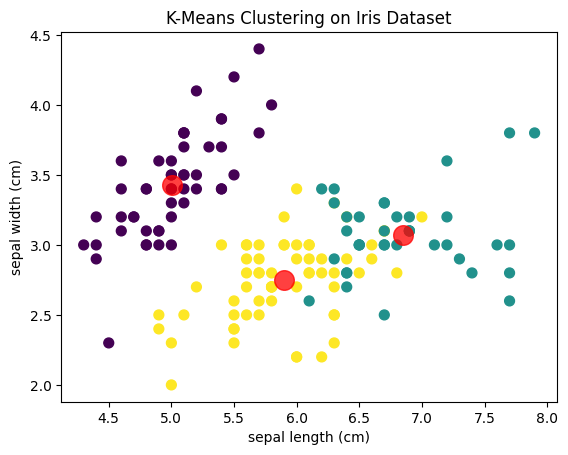

In [ ]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris #dataset Iris
from sklearn.cluster import KMeans

# Memuat dataset Iris
iris = load_iris()
X = iris.data

# Menjalankan algoritma K-Means dengan jumlah cluster yang ditentukan
kmeans = KMeans(n_clusters=3) #jumlah cluster
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Memvisualisasikan hasil clustering
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Menampilkan pusat cluster (centroid)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-Means Clustering on Iris Dataset')
plt.show()


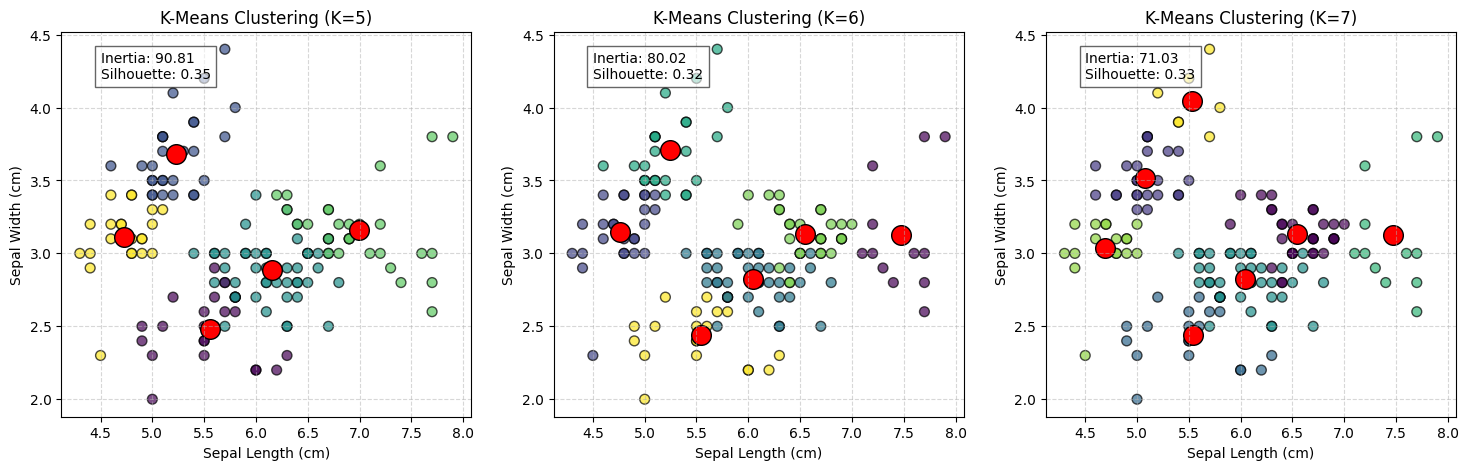

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  # Load Data
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Memuat dataset Iris
iris = load_iris()
X = iris.data  # Menggunakan seluruh fitur dataset

# Normalisasi data agar clustering lebih stabil
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah cluster yang akan diuji
k_values = [5, 6, 7]

# Visualisasi hasil clustering untuk tiap nilai K
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=20)
    kmeans.fit(X_scaled)
    y_kmeans = kmeans.predict(X_scaled)

    axes[i].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.7, edgecolors='k')

    # Menampilkan pusat cluster (centroid)
    centers = kmeans.cluster_centers_
    axes[i].scatter(centers[:, 0] * scaler.scale_[0] + scaler.mean_[0],
                    centers[:, 1] * scaler.scale_[1] + scaler.mean_[1],
                    c='red', s=200, marker='o', edgecolors='black')

    # Evaluasi clustering
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(X_scaled, y_kmeans)

    # Menampilkan informasi evaluasi lebih rapi
    axes[i].set_xlabel('Sepal Length (cm)', fontsize=10)
    axes[i].set_ylabel('Sepal Width (cm)', fontsize=10)
    axes[i].set_title(f'K-Means Clustering (K={k})', fontsize=12)

    # Menambahkan teks hasil evaluasi di dalam plot
    text_x = min(X[:, 0]) + 0.2
    text_y = max(X[:, 1]) - 0.2
    axes[i].text(text_x, text_y, f'Inertia: {inertia:.2f}\nSilhouette: {silhouette_avg:.2f}',
                 fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

    # Menambahkan grid untuk memperjelas
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.show()
